In [5]:
#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#평가 함수
from sklearn import metrics
#os: 환겨설정 패키지
import os 
#주성분 분석
from sklearn.decomposition import PCA
#상관계수 계산
from scipy import stats
#데이터 표준화 함수
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [6]:
ds_supervisor = pd.read_csv("../../실습화일/직무능력평가.csv", engine = "python")
ds_supervisor

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47
5,43,55,49,44,54,49,34
6,58,67,42,56,66,68,35
7,71,75,50,55,70,66,41
8,72,82,72,67,71,83,31
9,67,61,45,47,62,80,41


In [7]:
#데이터 표준화
scaler = StandardScaler()
ds_supervisor_scaled = scaler.fit_transform(ds_supervisor)
ds_supervisor_scaled[:5]

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [8]:
#목표 변수
ds_supervisor_y = ds_supervisor_scaled[:,0]
#설명 변수
ds_supervisor_x = ds_supervisor_scaled[:,1::]

Text(0, 0.5, 'sample index')

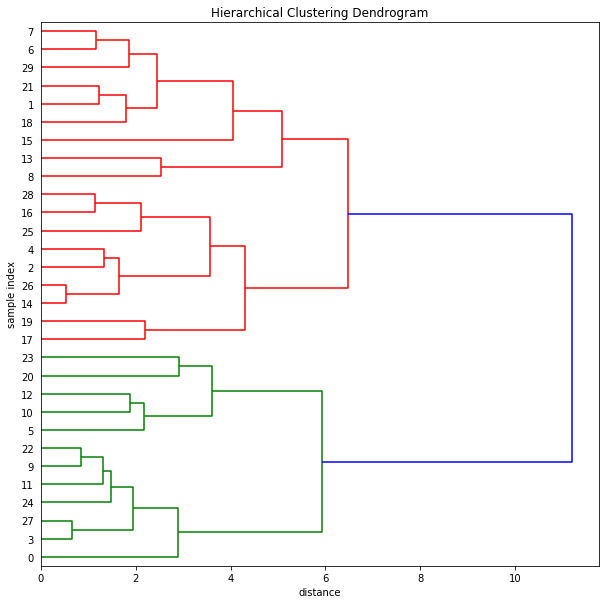

In [9]:
#연결 : ward, 거리 계산 : Euclidean
Z_ward = linkage(ds_supervisor_x, method = "ward", metric = "euclidean")
#연결 : average, 거리 계산 : Euclidean
Z_average = linkage(ds_supervisor_x, method = "average", metric = "euclidean")
#연결 : average, 거리 계산 : minkowski
Z_Minkowski = linkage(ds_supervisor_x, method = "average", metric = "minkowski")
#덴드로그램[연결: ward, 거리 계산 : Euclidean]
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [10]:
#linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z=Z_ward, t = 5, criterion = "distance")
#데이터에 계층형 군집 결과 입력
ds_supervisor["ClusterHierarchical"] = cluster_hierarchical

In [11]:
#집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = ds_supervisor.groupby("ClusterHierarchical").agg(["min","mean","max"])
#집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [12]:
#최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(ds_supervisor_x)
    #각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error":clus_error})
ds_error

,Error,NumberofCluster
0,180.000000,1
1,114.082503,2
2,94.368903,3
3,80.878096,4
4,66.651824,5
5,58.665382,6
6,50.729488,7
7,44.174699,8
8,37.747568,9
9,32.882626,10


Text(0, 0.5, 'Sum of squared distance')

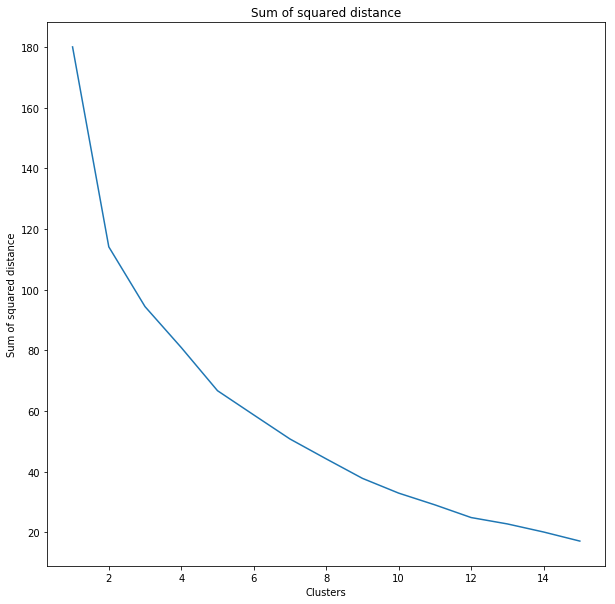

In [13]:
plt.figure(figsize = (10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [14]:
clus = KMeans(5)
clus.fit(ds_supervisor_x)
cluster_kmeans = [i+1 for i in clus.labels_]
ds_supervisor["ClusterKmeans"] = cluster_kmeans
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,4
1,63,64,51,54,63,73,47,5,2
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,4
4,81,78,56,66,71,83,47,3,3


In [15]:
ds_summary_km = ds_supervisor.drop("ClusterHierarchical", axis = 1, inplace = False).\
    groupby("ClusterKmeans").agg(["min","mean","max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
1,2,58,69.000,82,53,69.250,90,39,49.250,57,...,72,55,62.750,70,54,68.625,80,25,37.250,47
2,3,50,71.200,85,58,73.500,85,46,61.600,71,...,75,55,74.400,88,74,79.600,86,46,53.800,72
3,4,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
4,5,40,44.333,50,37,44.000,55,33,41.333,49,...,58,43,49.000,54,49,56.667,64,33,38.667,49


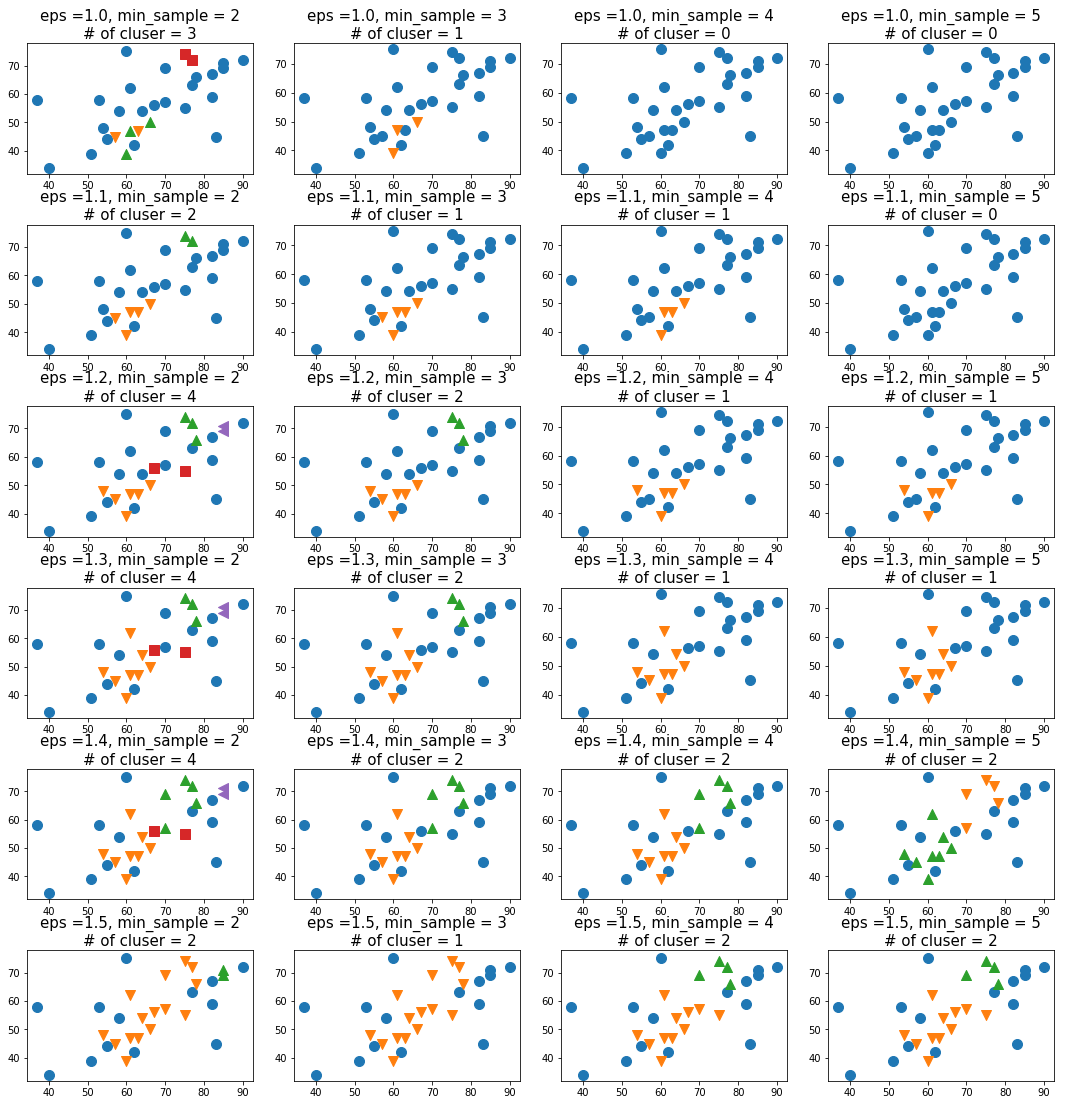

In [16]:
#X축 : DISSATIS 변수, Y축 : CHANCE
X = ds_supervisor["DISSATIS"]
Y = ds_supervisor["CHANCE"]
#데이터 point 그림 종류
markers = ["o","v","^","s","<",">","p","D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize =(15,15)) #plot 개수
fig.tight_layout(w_pad=1, h_pad = 3) #plot 간 간격
#enumerate(): 값의 index 와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps) #dbscan 실행
        clusters = dbscan.fit_predict(ds_supervisor_x) # 예측 분류
        clusters = clusters + 1 #noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): #군집별 다른 그림 지정
            axes[i,j].scatter(X[clusters == clus], Y[clusters==clus], marker = markers[n_clus], s = 100)
            axes[i,j].set_title("eps =" + str(eps) + ", min_sample = " + str(min_sample)+\
                               "\n# of cluser = " +str(max(clusters)), fontsize = 15)

In [17]:
#eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples=2).fit(ds_supervisor_x)
#군집 결과
cluster_dbscan = dbscan.labels_
#sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
#다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i]+1
ds_supervisor["ClusterDBScan"] = cluster_dbscan
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,4,0
1,63,64,51,54,63,73,47,5,2,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,4,1
4,81,78,56,66,71,83,47,3,3,2


In [18]:
#DB 스캔 군집별 요약 통계량
ds_summary_db = ds_supervisor.drop(["ClusterHierarchical", "ClusterKmeans"], axis = 1, inplace = False).\
            groupby("ClusterDBScan").agg(["min","mean","max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
